# Sujet
L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.
La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :
•	Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.
•	Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.
•	Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.
Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.


# Etape 1 : Préparation des données

In [2]:
# Import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')

In [3]:
# Import csv files
in_time_csv = pd.read_csv('./Base Data/in_time.csv')
out_time_csv = pd.read_csv('./Base Data/out_time.csv')
general_data_csv = pd.read_csv('./Base Data/general_data.csv')
manager_survey_data_csv = pd.read_csv('./Base Data/manager_survey_data.csv')
employee_survey_data_csv = pd.read_csv('./Base Data/employee_survey_data.csv')

Préparation des données de pointage :
- On supprime les valeurs manquantes (NaN) qui correspondent à un non-pointage
- On supprime les colonnes composées uniquement de NaN
- On transforme les pointages en quantité horaires travaillées

In [4]:
# Process in and out times
in_time_csv.shape

(4410, 262)

In [5]:
in_time_csv.head

<bound method NDFrame.head of       Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0              1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1              2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2              3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3              4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4              5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   
...          ...         ...                  ...                  ...   
4405        4406         NaN  2015-01-02 09:20:32  2015-01-05 10:17:53   
4406        4407         NaN  2015-01-02 10:03:41                  NaN   
4407        4408         NaN  2015-01-02 10:01:01  2015-01-05 09:33:00   
4408        4409         NaN  2015-01-02 10:17:05  2015-01-05 10:02:27   
4409        4410         NaN  2015-01-02 09:59:09  2015-01-05 10:16:14   

               2015-01-06           2015-01-07           2015-01-08  \
0     2015

In [6]:
# Append the two csv files, convert all fields except the header and the first two columns to pandas datetime
total_time_csv = in_time_csv.append(out_time_csv, ignore_index=True)
# Give NaN values a default value so the substraction will get to 0 days
total_time_csv = total_time_csv.replace(np.nan, 0)
total_time_csv.iloc[:, 1:] = total_time_csv.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
# Periods 4410 given the shape of our entry csv
total_time_csv = total_time_csv.diff(periods=4410, axis=0)
total_time_csv = total_time_csv.iloc[4410:]
total_time_csv.reset_index(inplace=True)
# Remove all columns with only 0 days value (no pointage)
total_time_csv.drop(columns=['Unnamed: 0', '2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25', 'index'
             ],axis=1,inplace=True)
# Conclude on a mean time per day
total_time_csv['Mean Time']=total_time_csv.mean(axis=1)
total_time_csv['hrs']=total_time_csv['Mean Time']/np.timedelta64(1, 'h')
total_time_csv.reset_index(inplace=True)
total_time_csv.drop(total_time_csv.columns.difference(['index','hrs']), 1, inplace=True)
total_time_csv.rename(columns={'index': 'EmployeeID'},inplace=True)

total_time_csv

,EmployeeID,hrs
0,0,6.870229
1,1,7.315971
2,2,6.816081
3,3,6.789215
4,4,7.877561
...,...,...
4405,4405,8.316921
4406,4406,5.897197
4407,4407,7.149526
4408,4408,9.187612


Création du fichier de données complètes :

In [7]:
# Merge the multiple csv files
complete_csv = pd.merge(general_data_csv, total_time_csv, on='EmployeeID', how='inner')
complete_csv = pd.merge(complete_csv, manager_survey_data_csv, on='EmployeeID', how='inner')
complete_csv = pd.merge(complete_csv, employee_survey_data_csv, on='EmployeeID', how='inner')
complete_csv.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4390.000000,4409.000000,4409.0,...,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4384.000000,4389.000000,4372.000000
mean,36.923112,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.695444,15.210252,8.0,...,2.798594,7.004990,2.187571,4.122023,7.314463,2.729644,3.153776,2.723996,2.728184,2.761436
std,9.134220,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.498840,3.659203,0.0,...,1.288222,6.122203,3.222042,3.566975,1.330903,0.711223,0.360775,1.092571,1.101371,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,5.416880,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,6.278995,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,7.011237,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,7.900932,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,10.937261,4.000000,4.000000,4.000000,4.000000,4.000000


Suppression des colonnes inutiles :

In [8]:
# Delete all print columns with always the same value
for col in complete_csv.columns:
    if len(complete_csv[col].unique()) == 1:
        complete_csv.drop(columns=[col],axis=1,inplace=True)
        print("Deleted : " + col + " (Cause : All values are the same)")

# The employee ID is not useful for the analysis
complete_csv.drop(columns=['EmployeeID'],axis=1,inplace=True)
print("Deleted : EmployeeID (Cause : Iteration not useful for the analysis)")


Deleted : EmployeeCount (Cause : All values are the same)
Deleted : Over18 (Cause : All values are the same)
Deleted : StandardHours (Cause : All values are the same)
Deleted : EmployeeID (Cause : Iteration not useful for the analysis)


Remplissage des données manquantes :

In [9]:
# Print the list of columns with NaN values and their type
for col in complete_csv.columns:
    if complete_csv[col].isna().values.any():
        print("Column with NaN : " + col + " (Type : " + str(complete_csv[col].dtype) + ")")

Column with NaN : NumCompaniesWorked (Type : float64)
Column with NaN : TotalWorkingYears (Type : float64)
Column with NaN : EnvironmentSatisfaction (Type : float64)
Column with NaN : JobSatisfaction (Type : float64)
Column with NaN : WorkLifeBalance (Type : float64)


Toutes ces colonnes peuvent avoir leurs valeurs manquantes remplacées par la médiane de la colonne car elles sont toutes numériques.

In [10]:
# Fill all numerical columns with the median of the column and print the list of the filled columns if they have nan values.
for col in complete_csv.columns:
    if complete_csv[col].isna().values.any():
        complete_csv[col].fillna(complete_csv[col].median(), inplace=True)
        print("Column with NaN filled with the median value : " + col)
#Verify if there is still NaN values
if complete_csv.isnull().values.any():
    print("There is still NaN values in the dataset.")
else:
    print("Dataset has been completely filled.")

Column with NaN filled with the median value : NumCompaniesWorked
Column with NaN filled with the median value : TotalWorkingYears
Column with NaN filled with the median value : EnvironmentSatisfaction
Column with NaN filled with the median value : JobSatisfaction
Column with NaN filled with the median value : WorkLifeBalance
Dataset has been completely filled.


Correction des types de données incorrects :
Ces données ne sont pas représentatives "linéairement", il faut donc les passer en type "object" pour éviter des erreurs lors de l'analyse.

In [11]:
complete_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   Gender                   4409 non-null   object 
 8   JobLevel                 4409 non-null   int64  
 9   JobRole                  4409 non-null   object 
 10  MaritalStatus            4409 non-null   object 
 11  MonthlyIncome            4409 non-null   int64  
 12  NumCompaniesWorked       4409 non-null   float64
 13  PercentSalaryHike        4409 non-null   int64  
 14  StockOptionLevel        

In [12]:
complete_csv['Education'] = complete_csv['Education'].astype('object')
complete_csv['EnvironmentSatisfaction'] = complete_csv['EnvironmentSatisfaction'].astype('object')
complete_csv['JobInvolvement'] = complete_csv['JobInvolvement'].astype('object')
complete_csv['JobSatisfaction'] = complete_csv['JobSatisfaction'].astype('object')
complete_csv['PerformanceRating'] = complete_csv['PerformanceRating'].astype('object')
complete_csv['JobLevel'] = complete_csv['JobLevel'].astype('object')
complete_csv['WorkLifeBalance'] = complete_csv['WorkLifeBalance'].astype('object')
complete_csv

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,7.315971,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,6.816081,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,2,5,0,3,6.789215,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,5,8,7,5,7.877561,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,2,6,0,4,10.275802,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,2,6,1,5,8.316921,2,3,3.0,4.0,3.0
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,5,3,0,2,5.897197,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,2,3,0,2,7.149526,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,4,4,1,2,9.187612,3,4,1.0,3.0,3.0


Remplacement des valeurs numériques par des valeurs textuelles :
Le jeu de données est assez propre, il ne reste plus qu'à remplacer certaines valeurs numériques par des valeurs textuelles pour faciliter l'analyse.

In [13]:
# Replace numerical values by text values
# general_data
complete_csv['Education'].replace({1: 'BAC', 2: 'BAC+2', 3: 'BAC+3', 4: 'BAC+5', 5: 'Doctorat'}, inplace=True)
# manager_survey
complete_csv['JobInvolvement'].replace({1: 'Faible', 2: 'Moyenne', 3: 'Importante', 4: 'Très importante'}, inplace=True)
complete_csv['PerformanceRating'].replace({1: 'Faible', 2: 'Bon', 3: 'Excellent', 4: 'Au delà des attentes'}, inplace=True)
# employee_survey
complete_csv['EnvironmentSatisfaction'].replace({1: 'Faible', 2: 'Moyen', 3: 'Élevé', 4: 'Très élevé'}, inplace=True)
complete_csv['JobSatisfaction'].replace({1: 'Faible', 2: 'Moyen', 3: 'Élevé', 4: 'Très élevé'}, inplace=True)
complete_csv['WorkLifeBalance'].replace({1: 'Mauvais', 2: 'Satisfaisant', 3: 'Très satisfaisant', 4: 'Excellent'}, inplace=True)

Pour être en accord avec la RGPD, nous séparons de certains attributs.

In [14]:
complete_csv.drop(columns=['MaritalStatus', 'Age', 'Gender'],axis=1,inplace=True)

Exportation du fichier de données complètes :

In [15]:
complete_csv.to_pickle('./Datasets/complete_csv_dataset.pkl')

# Etape 2 : Case Study

Les graphiques étant long à générer en fonction du matériel, pour l'analyse des données, se référer au fichier "Case Study.ipynb".

# Etape 3 : Préparation des données

Create one-hot encoding for categorical variables and store it in a new dataframe

In [16]:
# Get list of categorical columns except "Attrition"
cat_cols = complete_csv.select_dtypes(exclude=['int64', 'float64']).drop(columns=['Attrition']).columns
# Get dummies for categorical variables except int columns and "Attrition" column
dummy_df = pd.get_dummies(complete_csv[cat_cols], drop_first=True)
# Add new dummy columns to the original dataframe
finished_dataset = pd.concat([complete_csv, dummy_df], axis=1)
# Drop the original categorical columns except "Attrition"
finished_dataset.drop(columns=cat_cols, inplace=True)
# Replace Attrition column values with 0 and 1
finished_dataset['Attrition'] = complete_csv['Attrition'].map({'Yes': 1, 'No': 0})
#finished_dataset
# Create list of object type columns in complete_csv
obj_cols = complete_csv.select_dtypes(include=['object']).columns

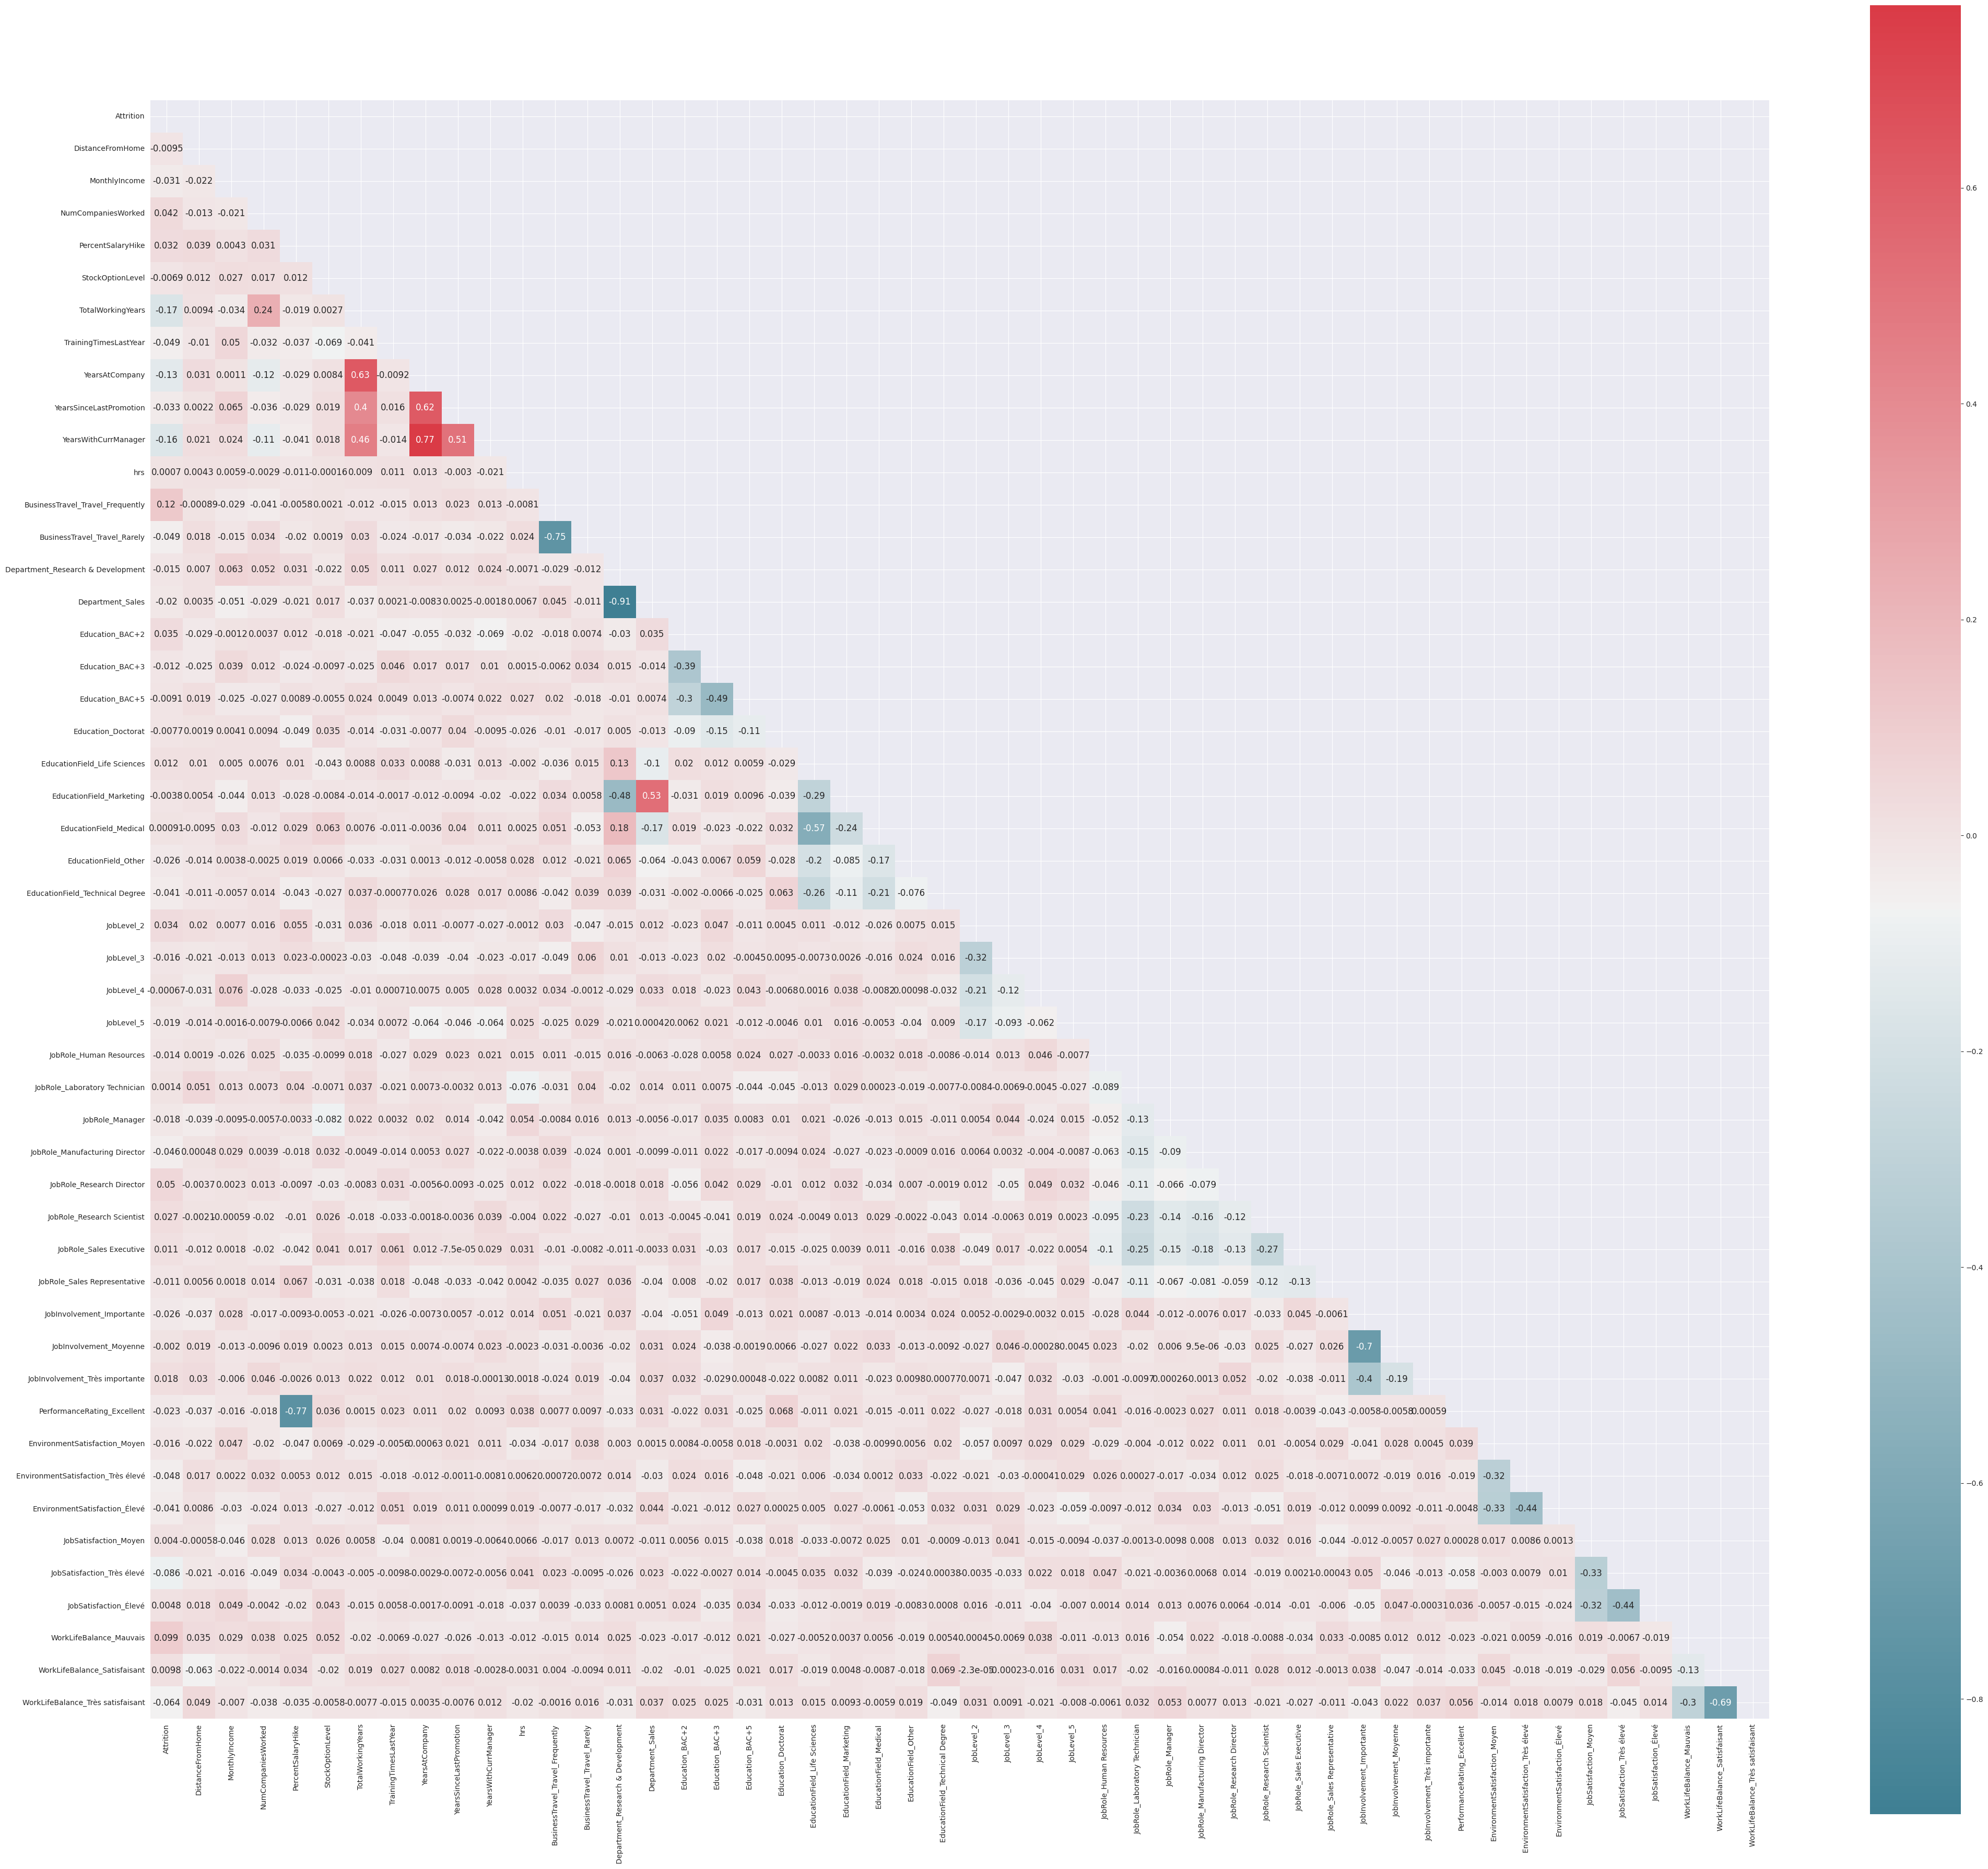

In [17]:
# Correlation matrix heatmap with more readable labels
def plot_correlation_map( df, Size=25 ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( Size , Size ) )
    triangle_mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        mask=triangle_mask,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(finished_dataset,50)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

finished_dataset[['MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome','hrs']] = sc.fit_transform(finished_dataset[['MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome','hrs']])

In [19]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = finished_dataset.drop('Attrition', axis=1)
y = finished_dataset['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Drop dummy variables that show too much correlation (they basically mean the same thing, such as "EducationField_Marketing" and "Department_Sales")
# Redo the correlation

# Do a triangle correlation so we do not have duplicates
corr = X.corr()
triangle_mask = np.triu(np.ones_like(corr, dtype=bool))
# Get the correlation values
new_correlation = corr.mask(triangle_mask).stack().reset_index()
# Rename the columns
new_correlation.columns = ['Variable 1', 'Variable 2', 'Taux de correlation']
# Drop NA Corr if there are
new_correlation.dropna(subset = ["Taux de correlation"], inplace=True)
# Drop the rows where the correlation is 1 (because it means the variable is correlated with itself)
# Round up the values and set them to absolute
new_correlation['Taux de correlation'] = new_correlation['Taux de correlation'].round(2)
new_correlation['Taux de correlation'] = new_correlation['Taux de correlation'].abs()
# Sort the correlations by descending order
new_correlation.sort_values(by='Taux de correlation', ascending=False, inplace=True)

# Keep only the first 50 rows
new_correlation = new_correlation.head(50)
# Get the list of unique variables in the "Variable 2" column
unique_variables = new_correlation['Variable 2'].unique()

X_train = X_train.drop(columns=unique_variables)
X_test = X_test.drop(columns=unique_variables)

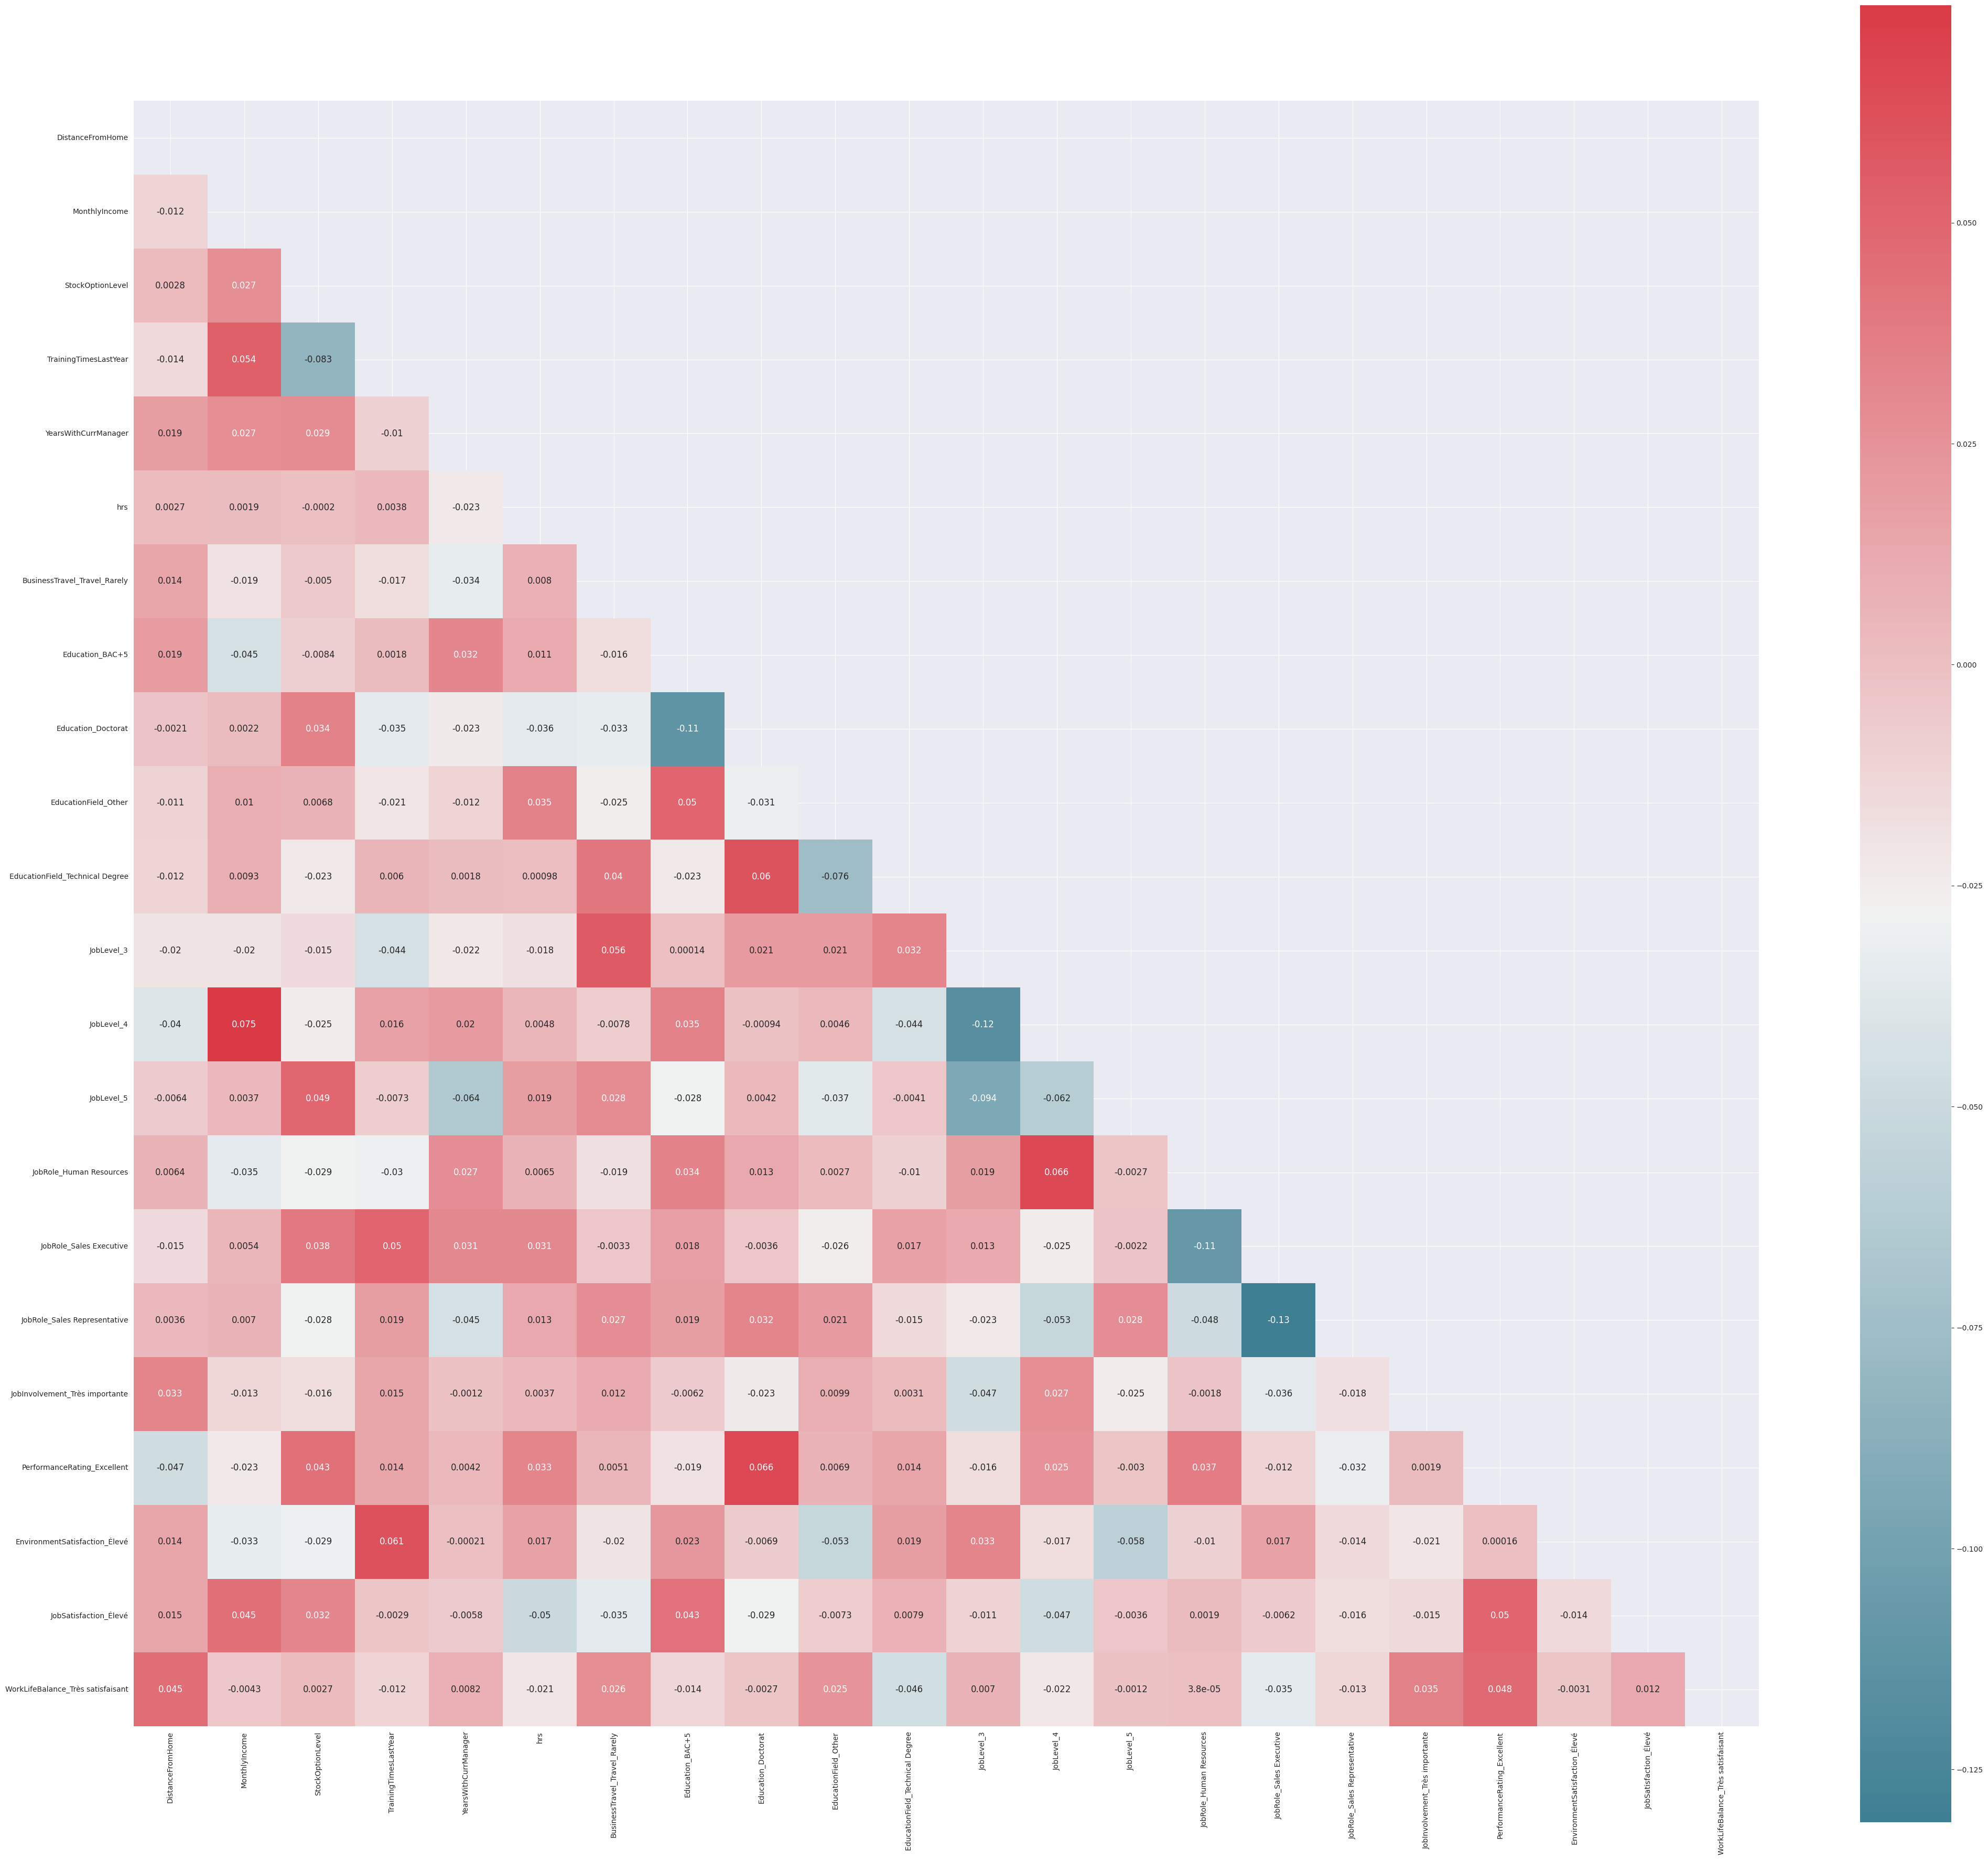

In [21]:
# Plot the matrix
plot_correlation_map(X_train,50)

# Etape 4 : Modélisation

In [22]:
X_train.shape
X_test.shape

(882, 22)

Create model with 1000 epoch to see until when it learns

[0]	validation_0-auc:0.72835	validation_0-error:0.13581	validation_1-auc:0.67426	validation_1-error:0.14626
[1]	validation_0-auc:0.78072	validation_0-error:0.12560	validation_1-auc:0.69698	validation_1-error:0.13492
[2]	validation_0-auc:0.83139	validation_0-error:0.12163	validation_1-auc:0.70654	validation_1-error:0.12812
[3]	validation_0-auc:0.86121	validation_0-error:0.12022	validation_1-auc:0.74968	validation_1-error:0.13379
[4]	validation_0-auc:0.88822	validation_0-error:0.11880	validation_1-auc:0.78056	validation_1-error:0.13265
[5]	validation_0-auc:0.89482	validation_0-error:0.11511	validation_1-auc:0.79491	validation_1-error:0.13039
[6]	validation_0-auc:0.91966	validation_0-error:0.11199	validation_1-auc:0.81114	validation_1-error:0.12585
[7]	validation_0-auc:0.93290	validation_0-error:0.11058	validation_1-auc:0.82286	validation_1-error:0.12585
[8]	validation_0-auc:0.94268	validation_0-error:0.10887	validation_1-auc:0.83243	validation_1-error:0.12472
[9]	validation_0-auc:0.94532

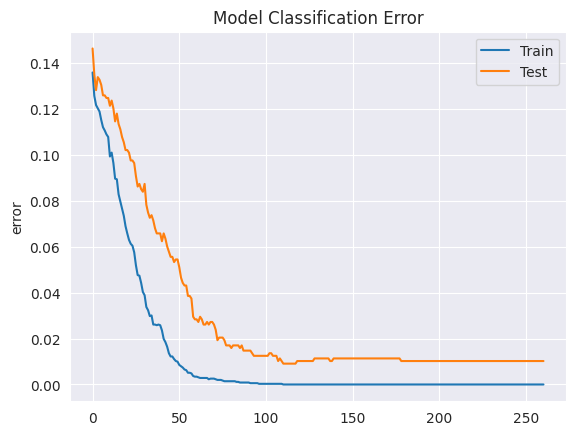

In [23]:
# XGBClassifier Model
from xgboost import XGBClassifier, plot_importance, DMatrix, cv
xgb = XGBClassifier(n_estimators=5000, early_stopping_rounds=150)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
xgb.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)
xgb_pred = xgb.predict(X_train)

# Plot error
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('error')
plt.title('Model Classification Error')
plt.show()

In [24]:
# Verify Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, xgb_pred))

1.0


Check for multicollinearity

In [25]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_train = pd.DataFrame()
vif_train["features"] = X_train.columns
vif_train["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Remove features with VIF > 5
X_train = X_train.drop(columns=vif_train[vif_train['VIF Factor'] > 5]['features'], axis=1)
X_test = X_test.drop(columns=vif_train[vif_train['VIF Factor'] > 5]['features'], axis=1)

[0]	validation_0-auc:0.72835	validation_0-error:0.13581	validation_1-auc:0.67426	validation_1-error:0.14626
[1]	validation_0-auc:0.78072	validation_0-error:0.12560	validation_1-auc:0.69698	validation_1-error:0.13492
[2]	validation_0-auc:0.83139	validation_0-error:0.12163	validation_1-auc:0.70654	validation_1-error:0.12812
[3]	validation_0-auc:0.86121	validation_0-error:0.12022	validation_1-auc:0.74968	validation_1-error:0.13379
[4]	validation_0-auc:0.88822	validation_0-error:0.11880	validation_1-auc:0.78056	validation_1-error:0.13265
[5]	validation_0-auc:0.89482	validation_0-error:0.11511	validation_1-auc:0.79491	validation_1-error:0.13039
[6]	validation_0-auc:0.91966	validation_0-error:0.11199	validation_1-auc:0.81114	validation_1-error:0.12585
[7]	validation_0-auc:0.93290	validation_0-error:0.11058	validation_1-auc:0.82286	validation_1-error:0.12585
[8]	validation_0-auc:0.94268	validation_0-error:0.10887	validation_1-auc:0.83243	validation_1-error:0.12472
[9]	validation_0-auc:0.94532

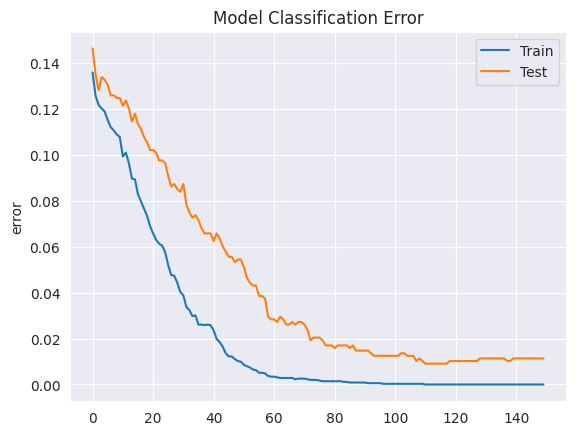

In [26]:
# Retrain the model
xgb = XGBClassifier(n_estimators=150)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
xgb.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set)
xgb_pred = xgb.predict(X_train)

# Plot error
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('error')
plt.title('Model Classification Error')
plt.show()

# Etape 5 : Evaluation du modèle

Confusion Matrix

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, xgb_pred)
cm

array([[2947,    0],
       [   0,  580]])

No Skill: ROC AUC=0.500
XGB: ROC AUC=0.988


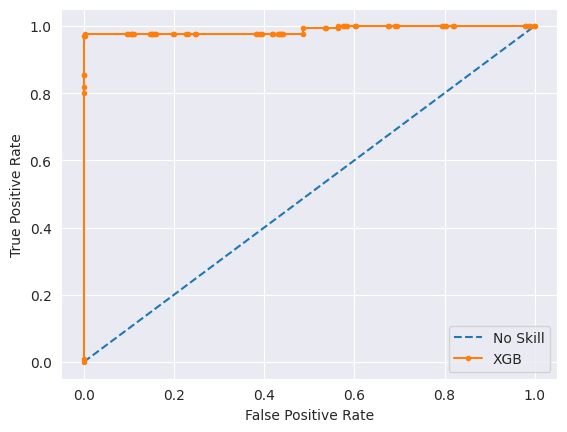

In [28]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
xgb_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [29]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision: %.3f' % precision_score(y_train, xgb_pred))
print('Recall: %.3f' % recall_score(y_train, xgb_pred))

Precision: 1.000
Recall: 1.000


# Dernière étape : Prédiction sur le jeu de test

In [30]:
#print Predictions on the test set
test_inference = xgb.predict(X_test)
accuracy = accuracy_score(y_test, test_inference)
accuracy

0.9886621315192744

In [31]:
# MAE & MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE: %.3f' % mean_absolute_error(y_test, test_inference))
print('RMSE: %.3f' % mean_squared_error(y_test, test_inference))

MAE: 0.011
RMSE: 0.011


In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_inference)
cm

array([[750,   1],
       [  9, 122]])

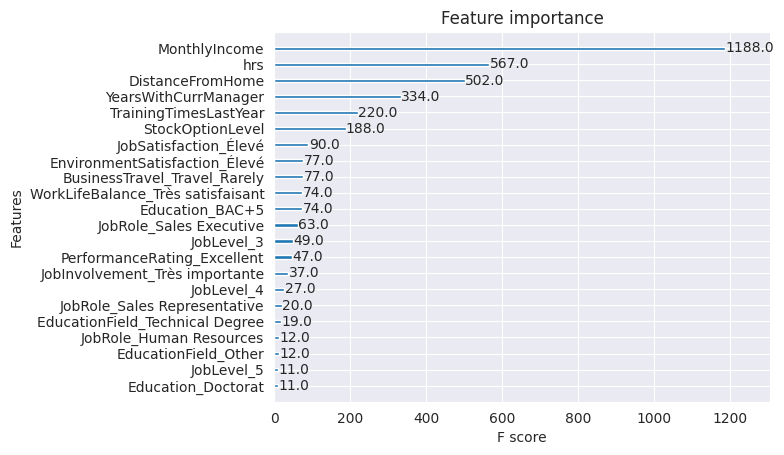

<Figure size 3200x1200 with 0 Axes>

In [33]:
plot_importance(xgb)
plt.figure(figsize = (32, 12))
plt.show()